In [1]:
# Evaluate GCP distribution
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

dn = "D:\\crs\\proj\\2015_Sandwich\\2017-04-28_U029_SandwichTNB_USGS_PT\\products\\"
fn = "2017-04-28_GCPs.txt"
print(dn+fn)
# read in the file (in the format exported from Photoscan)
df=pd.read_csv(dn+fn,delimiter=',',skiprows=[0])
df

D:\crs\proj\2015_Sandwich\2017-04-28_U029_SandwichTNB_USGS_PT\products\2017-04-28_GCPs.txt


,#Label,Enable,X/Easting,Y/Northing,Z/Altitude,Accuracy_X/Y/Z_(m),Error_(m),X_error,Y_error,Z_error,X_est,Y_est,Z_est
0,T18,1,377201.5432,4.624613e+06,1.6758,NaN,0.022384,0.001038,0.009886,0.020056,377201.544238,4.624613e+06,1.695856
1,T20,1,377034.3030,4.624693e+06,1.7620,NaN,0.046753,-0.041831,-0.005647,0.020103,377034.261178,4.624693e+06,1.782103
2,T19,1,377151.6261,4.624637e+06,1.1600,NaN,0.071438,-0.066716,-0.017912,-0.018206,377151.559398,4.624637e+06,1.141794
3,T17,1,377331.4144,4.624573e+06,-0.4845,NaN,0.040346,0.034412,0.013793,-0.015917,377331.448805,4.624573e+06,-0.500417
4,T16,1,377225.2911,4.624656e+06,2.5041,NaN,0.040223,0.010749,0.037160,0.011021,377225.301846,4.624656e+06,2.515121
5,T21,1,376941.3262,4.624769e+06,1.0644,NaN,0.012301,-0.002424,-0.008667,-0.008387,376941.323777,4.624769e+06,1.056013
6,T8,1,376539.5396,4.624997e+06,1.4488,NaN,0.019646,-0.019133,0.004154,-0.001625,376539.520471,4.624997e+06,1.447175
7,T14,1,377075.8505,4.624755e+06,2.3949,NaN,0.016995,0.006120,-0.014639,-0.006089,377075.856619,4.624755e+06,2.388811
8,P3,1,376537.6211,4.625135e+06,5.2726,NaN,0.048213,-0.020940,0.016748,0.040069,376537.600165,4.625135e+06,5.312669
9,T7,1,376507.8345,4.625230e+06,-0.2558,NaN,0.024300,0.010506,-0.020051,-0.008837,376507.845004,4.625230e+06,-0.264637


In [2]:
# Distance to closest neighbor
xyz = df.as_matrix(columns=df.columns[2:5])
n = len(xyz)
dist = np.zeros((n,1))
for i in np.arange(len(xyz)):
    # after sorting, index[1] is distance to closest neighbor
    dist[i]=np.sort(np.sqrt(np.sum((xyz-xyz[i,:])**2.,1)))[1] 
df['dist'] = dist

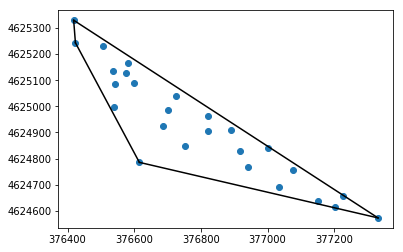

In [3]:
# determine 2D convex hull
xy = df.as_matrix(columns=df.columns[2:4])
hull = ConvexHull(xy)
plt.plot(xy[:,0], xy[:,1], 'o')
for simplex in hull.simplices:
    plt.plot(xy[simplex, 0], xy[simplex, 1], 'k-')

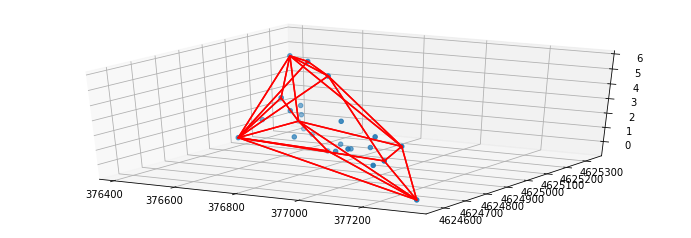

In [4]:
# determine 3D convex hull
xy = df.as_matrix(columns=df.columns[2:4])
hull3 = ConvexHull(xyz)

fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(111, projection='3d')
ax.scatter( xyz[:,0], xyz[:,1], xyz[:,2], marker='o')
for s in hull3.simplices:
    s = np.append(s, s[0])  # Here we cycle back to the first coordinate
    ax.plot(xyz[s, 0], xyz[s, 1], xyz[s, 2], "r-")

In [5]:
print("Elevation distribution:\n",df['Z/Altitude'].describe(),'\n')
print("Distance from nearest GCP:\n",df['dist'].describe(),'\n')
print("Area of 2D hull: ",hull.area, 'm^2') 
print("Average 2D hull area per GCP: ",hull.area/n, 'm^2') 
print("Volume of 3D hull: ",hull3.volume, 'm^3')    
print("Average 3D hull volume per GCP: ",hull3.volume/n, 'm^3')

Elevation distribution:
 count    26.000000
mean      1.711831
std       1.702569
min      -0.563300
25%       0.640725
50%       1.385050
75%       2.476800
max       5.739400
Name: Z/Altitude, dtype: float64 

Distance from nearest GCP:
 count     26.000000
mean      69.300023
std       27.243312
min       37.924662
25%       51.614444
50%       63.011069
75%       85.129411
max      150.906981
Name: dist, dtype: float64 

Area of 2D hull:  2516.095207032294 m^2
Average 2D hull area per GCP:  96.77289257816516 m^2
Volume of 3D hull:  540286.921419403 m^3
Average 3D hull volume per GCP:  20780.266208438577 m^3
